In [2]:
%pip install preprocessor


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4512 sha256=e448440af41eed950424e1cbf6580487c55147ff9ebfd7b0fc22579c276919bc
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\60\33\31\972a156cd609581707e69298b91f0e42d349c08fefc173e19e
Successfully built preprocessor


In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('tweets-data/scrapping-twitter-1.old.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1830032750390514067,Sat Aug 31 23:59:42 +0000 2024,1,𝐎𝐦𝐛𝐮𝐝𝐬𝐦𝐚𝐧 𝐑𝐈 𝐀𝐣𝐚𝐤 𝐒𝐞𝐦𝐮𝐚 𝐏𝐢𝐡𝐚𝐤 𝐁𝐚𝐧𝐠𝐮𝐧 𝐈𝐊𝐍 𝐃𝐞𝐧𝐠𝐚...,1830032750390514067,https://pbs.twimg.com/media/GWWVDpNbQAAZdV3.jpg,NaN,in,NaN,0,0,1,https://x.com/atikacaamelia/status/18300327503...,1786203658734231552,atikacaamelia
1,1829765153862402327,Sat Aug 31 23:59:12 +0000 2024,0,@SanieUye @KataNetizen @kangdede78 Gw pendukun...,1830032625681215550,NaN,SanieUye,in,NaN,0,0,0,https://x.com/sang_allam/status/18300326256812...,1225845041337270272,sang_allam
2,1830032558719189336,Sat Aug 31 23:58:57 +0000 2024,0,𝐁𝐚𝐥𝐢𝐤𝐩𝐚𝐩𝐚𝐧 𝐒𝐞𝐛𝐚𝐠𝐚𝐢 𝐊𝐨𝐭𝐚 𝐏𝐞𝐧𝐲𝐚𝐧𝐠𝐠𝐚 𝐈𝐊𝐍 𝐓𝐮𝐫𝐮𝐭 𝐌𝐞...,1830032558719189336,https://pbs.twimg.com/media/GWWU4Y-XcAAKeB7.jpg,NaN,in,NaN,0,0,1,https://x.com/AdinAlfani/status/18300325587191...,1627866323962458114,AdinAlfani
3,1830032381983776901,Sat Aug 31 23:58:14 +0000 2024,0,Fufufafa woy bukan fafafufu,1830032381983776901,NaN,NaN,in,World Wide Weeb,0,0,0,https://x.com/XOPwibu/status/1830032381983776901,148225284,XOPwibu
4,1830032367958048774,Sat Aug 31 23:58:11 +0000 2024,0,𝐏𝐞𝐦𝐢𝐧𝐝𝐚𝐡𝐚𝐧 𝐈𝐛𝐮 𝐊𝐨𝐭𝐚 𝐍𝐞𝐠𝐚𝐫𝐚 𝐌𝐞𝐧𝐮𝐣𝐮 𝐈𝐊𝐍 𝐃𝐢𝐛𝐚𝐠𝐢 𝐌...,1830032367958048774,https://pbs.twimg.com/media/GWWUtqpa4AAWA5e.jpg,NaN,in,NaN,0,0,1,https://x.com/SbywibowoMega/status/18300323679...,1751087661799059456,SbywibowoMega


In [5]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,𝐎𝐦𝐛𝐮𝐝𝐬𝐦𝐚𝐧 𝐑𝐈 𝐀𝐣𝐚𝐤 𝐒𝐞𝐦𝐮𝐚 𝐏𝐢𝐡𝐚𝐤 𝐁𝐚𝐧𝐠𝐮𝐧 𝐈𝐊𝐍 𝐃𝐞𝐧𝐠𝐚...,atikacaamelia,Sat Aug 31 23:59:42 +0000 2024
1,@SanieUye @KataNetizen @kangdede78 Gw pendukun...,sang_allam,Sat Aug 31 23:59:12 +0000 2024
2,𝐁𝐚𝐥𝐢𝐤𝐩𝐚𝐩𝐚𝐧 𝐒𝐞𝐛𝐚𝐠𝐚𝐢 𝐊𝐨𝐭𝐚 𝐏𝐞𝐧𝐲𝐚𝐧𝐠𝐠𝐚 𝐈𝐊𝐍 𝐓𝐮𝐫𝐮𝐭 𝐌𝐞...,AdinAlfani,Sat Aug 31 23:58:57 +0000 2024
3,Fufufafa woy bukan fafafufu,XOPwibu,Sat Aug 31 23:58:14 +0000 2024
4,𝐏𝐞𝐦𝐢𝐧𝐝𝐚𝐡𝐚𝐧 𝐈𝐛𝐮 𝐊𝐨𝐭𝐚 𝐍𝐞𝐠𝐚𝐫𝐚 𝐌𝐞𝐧𝐮𝐣𝐮 𝐈𝐊𝐍 𝐃𝐢𝐛𝐚𝐠𝐢 𝐌...,SbywibowoMega,Sat Aug 31 23:58:11 +0000 2024
...,...,...,...
420,Cetak sejarah baru Malam Minggu Fufufafa EH KO...,HGloria468,Sat Aug 31 16:42:28 +0000 2024
421,@detikcom Siappp kapan mulai bahas fufufafa bro?,Areaarsenal,Sat Aug 31 16:41:58 +0000 2024
422,Pemindahan ASN ke IKN mundur ke Oktober Malam ...,Her46mione7,Sat Aug 31 16:41:33 +0000 2024
423,@UusRsd sebenernya bisa aja ya pks jakarta out...,fufufafagnarly,Sat Aug 31 16:41:04 +0000 2024


In [6]:
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna()

In [7]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [8]:
df['full_text'] = df['full_text'].str.lower()

In [9]:
#normalisasi
norm = {
    " emg " : " emang ",
    "gw" : "saya",
    " gw " : " saya ",
    " wapres " : " wakil presiden ",
    " bgt " : " sangat ",
    " malming " : " malam minggu ",
    "malming" : "malam minggu",
    "gibranjadi" : "gibran jadi",
    " gibranjadi " : " gibran jadi ",
    "mk" : "mahkamah konstitusi",
    " mk " : " mahkamah konstitusi ",
    "klo" : "kalau",
    "melas" : "menimbulkan rasa belas kasihan",
    " melas " : " menimbulkan rasa belas kasihan ",
    " org " : " orang ",
    " klo " : " kalau ",
    " cb " : " coba ",
    " dl " : " dulu ",
    " lu " : " anda ",
    " udah " : " sudah ",
    " ga " : " tidak ",
    " ketum " : " ketua umum ",
    " sdh " : " sudah ",
    " dgn " : " dengan ",
    " dsb " : " dan sebagainya ",
    " dg " : " dengan ",
    " daja " : " saja ",
    " kalo " : " kalau ",
    " modol " : " kotoran ",
    " seret " : " terhambat ",
    " yaa " : " ya ",
    " jd " : " jadi ",
    " aja " : " saja ",
    " gtu " : " gitu ",
    " lebih2 " : " lebih ",
    " tp " : " tapi ",
    " wkwk " : " haha ",
    " emang " : " memang ",
    " sehitidak " : " sehingga ",
    " kemuntidakinannya " : " kemungkinan ",
    " IKN " : " Ibu Kota Negara ",
    " lek " : " kalau ",
    "come on" : " mari ",
    "kocak" : "aneh",
    " wkwkwkk " : " haha ",
    " metidakmbarkan " : " menggambarkan ",
    " yg " : " yang ",
    " gmn " : " gimana ",
    " ingfo " : " info ",
    "ingpo" : " info ",
    " nggak " : " tidak ",
    " gak " : " tidak ",
    " bangetdari " : " banget dari ",
    " vibes " : " suasana ",
    " mantab " : " keren ",
    " benarsetuju " : " benar setuju ",
    " stylish " : " bergaya ",
    " ngapusi " : " bohong ",
    " gede " : " besar ",
    " all in " : " yakin ",
    " blokkkkk " : " goblok ",
    " blokkkk " : " goblok ",
    " blokkk " : " goblok ",
    " blokk " : " goblok ",
    " blok " : " goblok ",
    " ri " : " republik indonesia ",
    " kem3nangan " : " kemenangan ",
    " sat set " : " cepat ",
    " ala " : " dari ",
    " best " : " terbaik ",
    " mantab " : " mantap ",
    " bgttt " : " banget ",
    " gue " : " saya ",
    "blom" : "belum",
    " blom " : " belum ",
    " ngata2in " : "menghina", 
    "h0mo" : "homoseksual",
    " wkwkkw " : " haha ",
    " gtu " : " gitu ",
    " wkwk " : " haha ",
    " dilepeh " : " dibuang ",
    "dilepeh" : "dibuang",
    " slalu " : " selalu ",
    "slalu" : "selalu",
    " hrs " : " harus ",
    " fixed " : " tetap ",
    " blom " : " belum ",
    " aing " : " aku ",
    " tehnologi " : " teknologi ",
    " jd " : " jadi ",
    " dg " : " dengan ",
    " kudu " : " harus ",
    " jk " : " jika ",
    " problem " : " masalah ",
    " iru " : " itu ",
    " duit " : " uang ",
    " duid " : " uang ",
    " bgsd " : " bangsat ",
    " jt " : " juta ",
    " stop " : " berhenti ",
    " ngeri " : " seram ",
    " turu " : " tidur ",
    " early " : " awal ",
    " pertamna " : " pertamina ",
    " yg " : " yang ",
    " mnurut " : " menurut ",
    " trus " : " terus ",
    " msh " : " masih ",
    " simple " : " mudah ",
    " worth " : " layak ",
    " hny " : " hanya ",
    " dn " : " dan ",
    " jln " : " jalan ",
    " bgt " : " banget ",
    " text " : " teks ",
    " end " : " selesai ",
    " kelen " : " kalian ",
    " tuk " : " untuk ",
    " kk " : " kakak ",
    " bacot " : "mulut"
}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,fufufafa eh aneh malam minggu purwokerto kaskus,atikacaamelia,Sat Aug 31 23:59:42 +0000 2024
1,saya pendukung 02 tapi akun fufufafa memang co...,sang_allam,Sat Aug 31 23:59:12 +0000 2024
2,wasit fufufafa purwokerto kaskus malam minggu,AdinAlfani,Sat Aug 31 23:58:57 +0000 2024
3,fufufafa woy bukan fafafufu,XOPwibu,Sat Aug 31 23:58:14 +0000 2024
4,fufufafa partai perubahan indonesia malam ming...,SbywibowoMega,Sat Aug 31 23:58:11 +0000 2024
...,...,...,...
420,cetak sejarah baru malam minggu fufufafa eh an...,HGloria468,Sat Aug 31 16:42:28 +0000 2024
421,siappp kapan mulai bahas fufufafa bro,Areaarsenal,Sat Aug 31 16:41:58 +0000 2024
422,pemindahan asn ke ikn mundur ke oktober malam ...,Her46mione7,Sat Aug 31 16:41:33 +0000 2024
423,sebenernya bisa saja ya pks jakarta out dari d...,fufufafagnarly,Sat Aug 31 16:41:04 +0000 2024


In [10]:
#stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = ["tidak", "eh", "woy", "pas ku lamin", "cuy", "coy", "si", "ahok", "kaka boss", "pertalite"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username,created_at
0,fufufafa aneh malam minggu purwokerto kaskus,atikacaamelia,Sat Aug 31 23:59:42 +0000 2024
1,pendukung 02 akun fufufafa memang cocok banget...,sang_allam,Sat Aug 31 23:59:12 +0000 2024
2,wasit fufufafa purwokerto kaskus malam minggu,AdinAlfani,Sat Aug 31 23:58:57 +0000 2024
3,fufufafa bukan fafafufu,XOPwibu,Sat Aug 31 23:58:14 +0000 2024
4,fufufafa partai perubahan indonesia malam ming...,SbywibowoMega,Sat Aug 31 23:58:11 +0000 2024
...,...,...,...
420,cetak sejarah baru malam minggu fufufafa aneh ...,HGloria468,Sat Aug 31 16:42:28 +0000 2024
421,siappp kapan mulai bahas fufufafa bro,Areaarsenal,Sat Aug 31 16:41:58 +0000 2024
422,pemindahan asn ikn mundur oktober malam minggu...,Her46mione7,Sat Aug 31 16:41:33 +0000 2024
423,sebenernya saja pks jakarta out dukung rk meng...,fufufafagnarly,Sat Aug 31 16:41:04 +0000 2024


In [11]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [fufufafa, aneh, malam, minggu, purwokerto, ka...
1      [pendukung, 02, akun, fufufafa, memang, cocok,...
2      [wasit, fufufafa, purwokerto, kaskus, malam, m...
3                            [fufufafa, bukan, fafafufu]
4      [fufufafa, partai, perubahan, indonesia, malam...
                             ...                        
420    [cetak, sejarah, baru, malam, minggu, fufufafa...
421         [siappp, kapan, mulai, bahas, fufufafa, bro]
422    [pemindahan, asn, ikn, mundur, oktober, malam,...
423    [sebenernya, saja, pks, jakarta, out, dukung, ...
424    [apa, kemungkinan, fufufafa, ngaku, sbg, rkgbr...
Name: full_text, Length: 424, dtype: object

In [12]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

fufufafa aneh malam minggu purwokerto kaskus
dukung 02 akun fufufafa memang cocok banget sama gibran pas ku lamin
wasit fufufafa purwokerto kaskus malam minggu
fufufafa bukan fafafufu
fufufafa partai ubah indonesia malam minggu purwokerto
kalau pernah ngaskus tau jelas apalagi main subforum sama 1 mana tau akun raka gnarly bisa log in lupa password 2 kalau cuma klaim akun asli muncul fufufafa habis 3 buat apa ngeklaim raka gnarly
fufufafa purwokerto wasit kaskus sanggup
moga besok mayor teddy sigap lindung pak praroro dr fufufafa
malam minggu fufufafa purwokerto malam minggu
gak terdebunk jg kalau fufufafa bukan gibran jadi it is what it is
malam minggu fufufafa purwokerto malam minggu
perintah komitmen selenggara pilkada 2024 sesuai konstitusi kait ada putus mahkamah konstitusi mahkamah konstitusi kena laksana pilkada serentak 2024 kaka boss jepang purwokerto fufufafa
kata2 bijag hari makin tua makin sampah
pindah ikn bukan dar pindah ibu kota perintah jadi bagi upaya besar indonesia 

In [13]:
tokenized.to_csv("hasil-preprocessing_2.csv")

In [14]:
data = pd.read_csv("hasil-preprocessing_2.csv")
data.head()

,Unnamed: 0,full_text
0,0,fufufafa aneh malam minggu purwokerto kaskus
1,1,dukung 02 akun fufufafa memang cocok banget sa...
2,2,wasit fufufafa purwokerto kaskus malam minggu
3,3,fufufafa bukan fafafufu
4,4,fufufafa partai ubah indonesia malam minggu pu...


In [23]:
%pip install mtranslate

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3680 sha256=6aab52e3b5d497e94032701d3d349da3df97c9a802e4220f1b95a630077f26d0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\5b\83\c25d4a866e5f15021667de75eebe8e9aec1b673237a44c4d0a
Successfully built mtranslate
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from mtranslate import translate

def translate_with_mtranslate(text):
    return translate(text, 'en', 'id')

data['tweet_english']=data['full_text'].apply(translate_with_mtranslate)
data

,Unnamed: 0,full_text,tweet_english
0,0,fufufafa aneh malam minggu purwokerto kaskus,fufufafa strange saturday night purwokerto kaskus
1,1,dukung 02 akun fufufafa memang cocok banget sa...,support 02 fufufafa account really suits Gibra...
2,2,wasit fufufafa purwokerto kaskus malam minggu,referee fufufafa purwokerto kaskus saturday night
3,3,fufufafa bukan fafafufu,fufufafa not fafafufu
4,4,fufufafa partai ubah indonesia malam minggu pu...,fufufafa party change indonesia saturday night...
...,...,...,...
419,420,cetak sejarah baru malam minggu fufufafa aneh ...,make new history Saturday night fufufafa stran...
420,421,siappp kapan mulai bahas fufufafa bro,"ready, when will we start discussing fufufafa ..."
421,422,pindah asn ikn mundur oktober malam minggu fuf...,move ASN IKN resign October Saturday night fuf...
422,423,sebenernya saja pks jakarta out dukung rk usun...,"Actually, PKS Jakarta out supports RK, nominat..."


In [25]:
data.to_csv("tweet-english-2.csv")

In [31]:
eng = pd.read_csv("tweet-english-2.csv")
eng.head()

,Unnamed: 0.1,Unnamed: 0,full_text,tweet_english
0,0,0,fufufafa aneh malam minggu purwokerto kaskus,fufufafa strange saturday night purwokerto kaskus
1,1,1,dukung 02 akun fufufafa memang cocok banget sa...,support 02 fufufafa account really suits Gibra...
2,2,2,wasit fufufafa purwokerto kaskus malam minggu,referee fufufafa purwokerto kaskus saturday night
3,3,3,fufufafa bukan fafafufu,fufufafa not fafafufu
4,4,4,fufufafa partai ubah indonesia malam minggu pu...,fufufafa party change indonesia saturday night...


In [32]:
eng.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

,full_text,tweet_english
0,fufufafa aneh malam minggu purwokerto kaskus,fufufafa strange saturday night purwokerto kaskus
1,dukung 02 akun fufufafa memang cocok banget sa...,support 02 fufufafa account really suits Gibra...
2,wasit fufufafa purwokerto kaskus malam minggu,referee fufufafa purwokerto kaskus saturday night
3,fufufafa bukan fafafufu,fufufafa not fafafufu
4,fufufafa partai ubah indonesia malam minggu pu...,fufufafa party change indonesia saturday night...
...,...,...
419,cetak sejarah baru malam minggu fufufafa aneh ...,make new history Saturday night fufufafa stran...
420,siappp kapan mulai bahas fufufafa bro,"ready, when will we start discussing fufufafa ..."
421,pindah asn ikn mundur oktober malam minggu fuf...,move ASN IKN resign October Saturday night fuf...
422,sebenernya saja pks jakarta out dukung rk usun...,"Actually, PKS Jakarta out supports RK, nominat..."


In [50]:
from textblob import TextBlob

data_tweet = list(eng['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positive')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Neutral')
    else:
        total_negatif += 1
        status.append('Negative')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 181
Netral = 158
Negatif = 85

Total Data : 424


In [51]:
eng['klasifikasi'] = status
eng

,Unnamed: 0.1,Unnamed: 0,full_text,tweet_english,klasifikasi
0,0,0,fufufafa aneh malam minggu purwokerto kaskus,fufufafa strange saturday night purwokerto kaskus,Negative
1,1,1,dukung 02 akun fufufafa memang cocok banget sa...,support 02 fufufafa account really suits Gibra...,Positive
2,2,2,wasit fufufafa purwokerto kaskus malam minggu,referee fufufafa purwokerto kaskus saturday night,Neutral
3,3,3,fufufafa bukan fafafufu,fufufafa not fafafufu,Neutral
4,4,4,fufufafa partai ubah indonesia malam minggu pu...,fufufafa party change indonesia saturday night...,Neutral
...,...,...,...,...,...
419,419,420,cetak sejarah baru malam minggu fufufafa aneh ...,make new history Saturday night fufufafa stran...,Positive
420,420,421,siappp kapan mulai bahas fufufafa bro,"ready, when will we start discussing fufufafa ...",Positive
421,421,422,pindah asn ikn mundur oktober malam minggu fuf...,move ASN IKN resign October Saturday night fuf...,Positive
422,422,423,sebenernya saja pks jakarta out dukung rk usun...,"Actually, PKS Jakarta out supports RK, nominat...",Neutral


In [52]:
dataset = eng.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'full_text'])
dataset

,tweet_english,klasifikasi
0,fufufafa strange saturday night purwokerto kaskus,Negative
1,support 02 fufufafa account really suits Gibra...,Positive
2,referee fufufafa purwokerto kaskus saturday night,Neutral
3,fufufafa not fafafufu,Neutral
4,fufufafa party change indonesia saturday night...,Neutral
...,...,...
419,make new history Saturday night fufufafa stran...,Positive
420,"ready, when will we start discussing fufufafa ...",Positive
421,move ASN IKN resign October Saturday night fuf...,Positive
422,"Actually, PKS Jakarta out supports RK, nominat...",Neutral


In [53]:
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [54]:
dataset

[('fufufafa strange saturday night purwokerto kaskus', 'Negative'),
 ('support 02 fufufafa account really suits Gibran when I laminate',
  'Positive'),
 ('referee fufufafa purwokerto kaskus saturday night', 'Neutral'),
 ('fufufafa not fafafufu', 'Neutral'),
 ('fufufafa party change indonesia saturday night purwokerto', 'Neutral'),
 ("If you've ever discussed it, you know clearly, especially if you play the same subforum. 1. How do you know if the Raka Gnarly account can log in? Forgot the password? 2 If you just claim the original account, fufufafa appears, it's finished. 3 Why claim Raka Gnarly?",
  'Positive'),
 ('fufufafa purwokerto referee kaskus is capable', 'Positive'),
 ('Hopefully tomorrow Mayor Teddy will be alert to protect Mr Praroro from Fufufafa',
  'Neutral'),
 ('fufufafa purwokerto saturday night fufufafa purwokerto saturday night',
  'Neutral'),
 ("It's not denied that Fufufafa is not Gibran, so it is what it is",
  'Neutral'),
 ('fufufafa purwokerto saturday night fufu

In [55]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [65]:
train_set

[('Opponent calls KPK and immediately shrinks and supports Bowo tomorrow',
  'Neutral'),
 ("OK, fix, you're not a narcoboy, guys, you prefer staying up late for this",
  'Positive'),
 ('proof that pinocchio master mind dirty mind dirty hand all the chaos in this republic and will continue the fat one greeting fufufafa beautiful beach koplo',
  'Negative'),
 ('god so fufufafa lead meaning better loser', 'Positive'),
 ('you better step back', 'Positive'),
 ('fufufafa not fafafufu', 'Neutral'),
 ("it's time to use fafifuwaswesos to replace fufufafa lutju which is shorter",
  'Neutral'),
 ("fufufafa bro it's viral again", 'Neutral'),
 ('fufufafa urgent task jokiwi solution jokiwi always has a deadline',
  'Neutral'),
 ('who wants freebet, come on, come on, bio link tags thank you haechan, strange saturday night, sleeping ilyy, happy birthday my love fufufafa',
  'Positive'),
 ("post reply luffy88 2019 proof already knew for a long time fufufafa gibran also vaguely remembers once raising th

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Pisahkan teks dan label
texts, labels = zip(*train_set)

# Vectorizer untuk mengubah teks menjadi fitur numerik (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Membagi dataset untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.32, random_state=24)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi data test
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Test: ", accuracy)

Akurasi Test:  0.6029411764705882


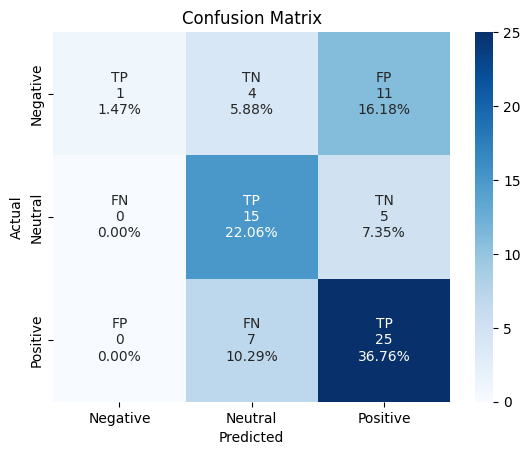

In [81]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Dapatkan semua label unik dari y_test dan y_pred
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

# Hitung Confusion Matrix dengan label yang benar
cf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Nama grup untuk confusion matrix
num_classes = len(unique_labels)
group_names = ['TP', 'TN', 'FP', 'FN']  # Label grup ini hanya untuk placeholder
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

# Gabungkan informasi ke dalam satu label
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names * (num_classes ** 2), group_counts, group_percentages)]
labels = np.asarray(labels).reshape(num_classes, num_classes)  # Atur ukuran confusion matrix

# Buat heatmap confusion matrix
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)

# Judul dan label sumbu
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Tampilkan plot
plt.show()

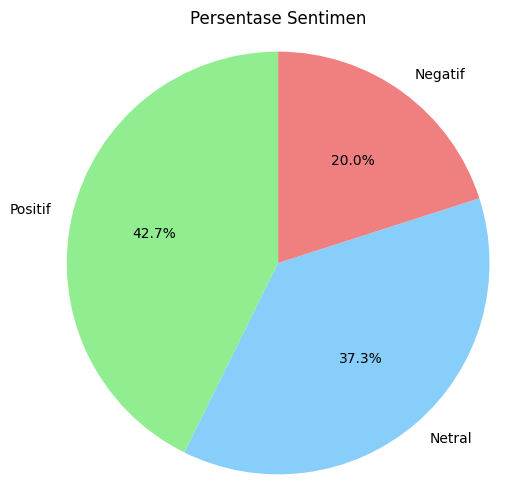

In [90]:
import matplotlib.pyplot as plt

#data
labels = ['Positif', 'Netral', 'Negatif']
sizes = [181, 158, 85]
colors = ['lightgreen', 'lightskyblue', 'lightcoral']  #warna

#pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(colors), startangle=90)
for autotext in autotexts:
    autotext.set_color('black')

#show pie chart
plt.axis('equal')
plt.title('Persentase Sentimen')
plt.show()
